# Contributor Predictive Modeling Demo

This notebook demonstrates how to use the predictive models implemented in `contributor_predictive_models.py` to analyze the relationship between contributor experience and impact metrics. We'll explore both regression and classification models to predict contributor impact and identify key factors that influence productivity.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import plotly.express as px

# Import our predictive modeling functions
from contributor_predictive_models import (
    load_and_preprocess_data,
    prepare_features_and_target,
    train_regression_models,
    train_classification_models,
    plot_regression_results,
    plot_classification_results,
    cluster_contributors
)

# Set visualization style
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## 1. Load and Explore the Dataset

In [2]:
# Load and preprocess the data
df = load_and_preprocess_data()

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1166, 22)


,author_name,first_contribution,last_contribution,total_commits,total_files_changed,total_additions,total_deletions,years_since_first_commit,active_years,total_changes,impact_score,impact_per_year,avg_additions_per_commit,avg_deletions_per_commit,avg_files_per_commit,commits_per_year,recency_score,consistency_score,weighted_impact_score,contribution_duration,avg_changes_per_commit,active_ratio
0,/usr/local/ΕΨΗΕΛΩΝ,2015-11-03 11:30:34+00:00,2015-11-03 11:30:34+00:00,1,1,13,0,9.831622,0.000000,13,31.2,572.248618,13.000000,0.000000,1.0,11.782258,0.017385,0.00000,21.921363,0,13.000000,0.00000
1,0xflotus,2018-10-01 16:23:02+00:00,2018-10-01 19:29:33+00:00,3,3,5,5,6.921287,0.000000,10,28.1,572.248618,1.666667,1.666667,1.0,11.782258,0.308419,0.00000,20.969986,0,3.333333,0.00000
2,1993heqiang,2023-02-25 12:58:48+00:00,2023-03-30 14:46:18+00:00,2,3,11,11,2.518823,0.090349,22,38.1,421.697727,5.500000,5.500000,1.5,22.136364,0.757700,0.03587,31.205251,33,11.000000,0.03587
3,67,2022-11-11 07:44:26+00:00,2022-11-11 07:44:26+00:00,1,2,2,2,2.809035,0.000000,4,10.4,572.248618,2.000000,2.000000,2.0,11.782258,0.719370,0.00000,8.402218,0,4.000000,0.00000
4,70825,2023-08-19 06:35:33+00:00,2023-08-19 06:35:33+00:00,1,4,7,7,2.039699,0.000000,14,23.3,572.248618,7.000000,7.000000,4.0,11.782258,0.796304,0.00000,19.093082,0,14.000000,0.00000


In [3]:
# Display summary statistics
df.describe()

,total_commits,total_files_changed,total_additions,total_deletions,years_since_first_commit,active_years,total_changes,impact_score,impact_per_year,avg_additions_per_commit,avg_deletions_per_commit,avg_files_per_commit,commits_per_year,recency_score,consistency_score,weighted_impact_score,contribution_duration,avg_changes_per_commit,active_ratio
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1.166000e+03,1.166000e+03,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1.166000e+03,1166.000000,1166.000000,1166.000000
mean,25.849914,189.389365,3385.071184,1980.878216,5.631113,0.512981,5.365949e+03,7.927709e+03,3420.543411,64.495275,24.493242,5.522257,26.681016,0.509537,0.067528,7.466192e+03,187.366209,88.988517,0.067528
std,314.040481,1879.980850,35290.022760,22823.818620,3.740291,1.868266,5.538809e+04,8.168754e+04,31280.913821,251.988402,189.166313,60.608297,116.744770,0.308262,0.198961,7.928175e+04,682.384093,416.746206,0.198961
min,1.000000,1.000000,0.000000,0.000000,0.010951,0.000000,1.000000e+00,5.700000e+00,2.739820,0.000000,0.000000,1.000000,0.230369,0.000000,0.000000,4.335628e+00,0.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,2.563997,0.000000,4.000000e+00,1.020000e+01,572.248618,1.500000,1.000000,1.000000,11.782258,0.264956,0.000000,7.555861e+00,0.000000,3.000000,0.000000
50%,1.000000,2.000000,10.000000,2.000000,5.300479,0.000000,1.500000e+01,3.040000e+01,572.248618,8.000000,2.000000,1.000000,11.782258,0.540178,0.000000,2.365261e+01,0.000000,12.000000,0.000000
75%,1.000000,4.000000,52.000000,10.000000,7.840520,0.000000,6.875000e+01,1.181250e+02,572.248618,39.468750,7.000000,2.500000,11.782258,0.782820,0.000000,9.405878e+01,0.000000,49.250000,0.000000
max,7738.000000,37895.000000,762326.000000,599552.000000,17.144422,16.829569,1.145232e+06,1.584984e+06,868666.770000,3856.000000,4596.000000,1875.375000,2922.000000,1.000000,0.999541,1.540736e+06,6147.000000,8452.000000,0.999541


## 2. Regression Models: Predicting Impact Score

We'll start by building regression models to predict the `impact_score` of contributors based on their activity metrics.

In [4]:
# Prepare features and target for regression
X, y = prepare_features_and_target(df, target_col='impact_score')

# Display the features we'll use for modeling
print("Features for modeling:")
print(X.columns.tolist())
print(f"\nTarget variable: impact_score")
print(f"Target shape: {y.shape}")

Features for modeling:
['total_commits', 'total_files_changed', 'total_additions', 'total_deletions', 'years_since_first_commit', 'active_years', 'total_changes', 'avg_additions_per_commit', 'avg_deletions_per_commit', 'avg_files_per_commit', 'recency_score', 'consistency_score', 'contribution_duration', 'avg_changes_per_commit', 'active_ratio']

Target variable: impact_score
Target shape: (1166,)


In [5]:
# Train regression models
results, feature_importances, X_train, X_test, y_train, y_test = train_regression_models(X, y)

# Print results
print("Regression Model Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

Regression Model Results:

Linear Regression:
  MSE: 0.0000
  RMSE: 0.0000
  R2: 1.0000
  MAE: 0.0000

Ridge Regression:
  MSE: 1465.2430
  RMSE: 38.2785
  R2: 1.0000
  MAE: 16.4905

Lasso Regression:
  MSE: 1062.9910
  RMSE: 32.6035
  R2: 1.0000
  MAE: 18.4960

Random Forest:
  MSE: 9632696.8604
  RMSE: 3103.6586
  R2: 0.9320
  MAE: 351.2844

Gradient Boosting:
  MSE: 144930.7163
  RMSE: 380.6977
  R2: 0.9990
  MAE: 69.3042


In [6]:
# Find the best model based on R2 score
best_model_name = max(results, key=lambda x: results[x]['R2'])
print(f"Best model: {best_model_name} (R2: {results[best_model_name]['R2']:.4f})")

# Print feature importances for the best model
if best_model_name in feature_importances:
    print("\nTop 10 features:")
    print(feature_importances[best_model_name].head(10))

Best model: Linear Regression (R2: 1.0000)

Top 10 features:
total_additions             5.628915e+04
total_changes               3.515119e+04
total_deletions             1.766218e+03
total_commits               1.751506e+03
total_files_changed         4.193093e+02
recency_score               5.373388e-11
years_since_first_commit    4.447018e-11
active_years                2.848819e-11
avg_deletions_per_commit    2.377533e-11
contribution_duration       1.885033e-11
dtype: float64


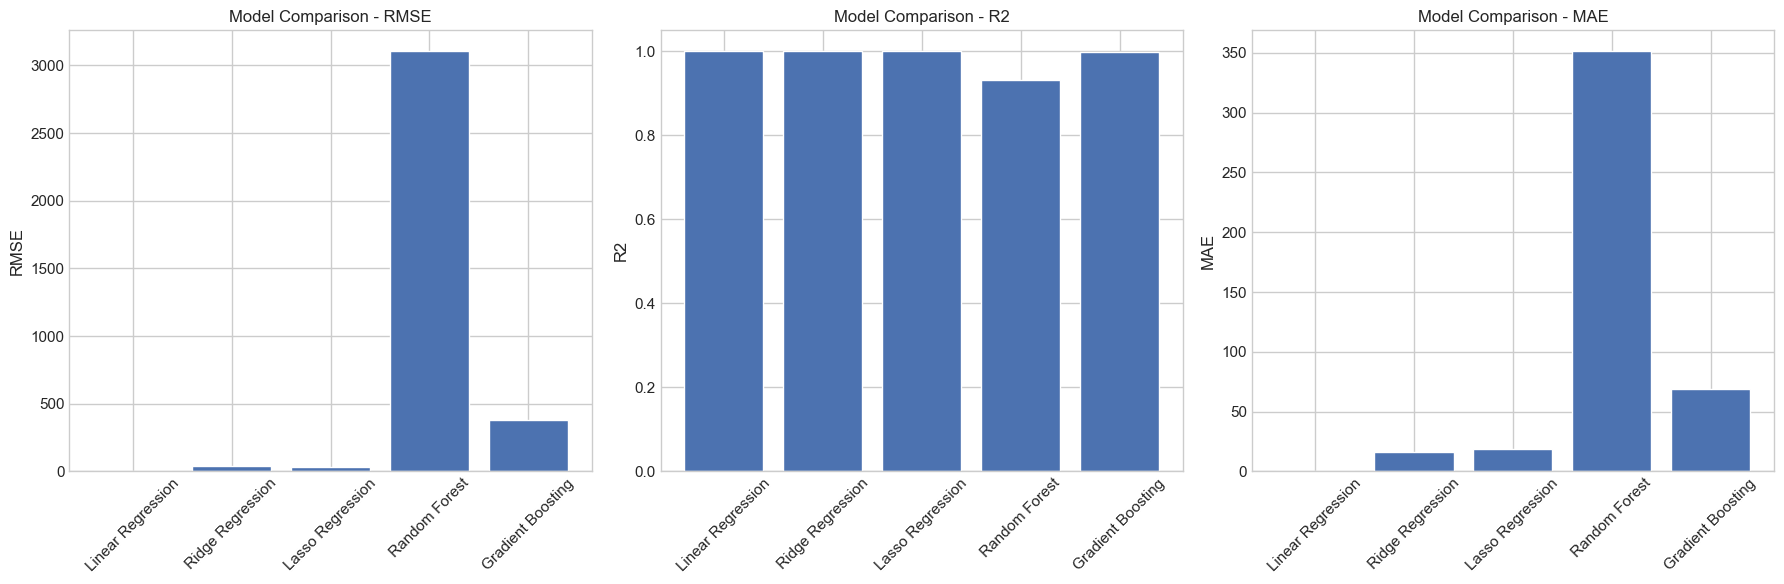

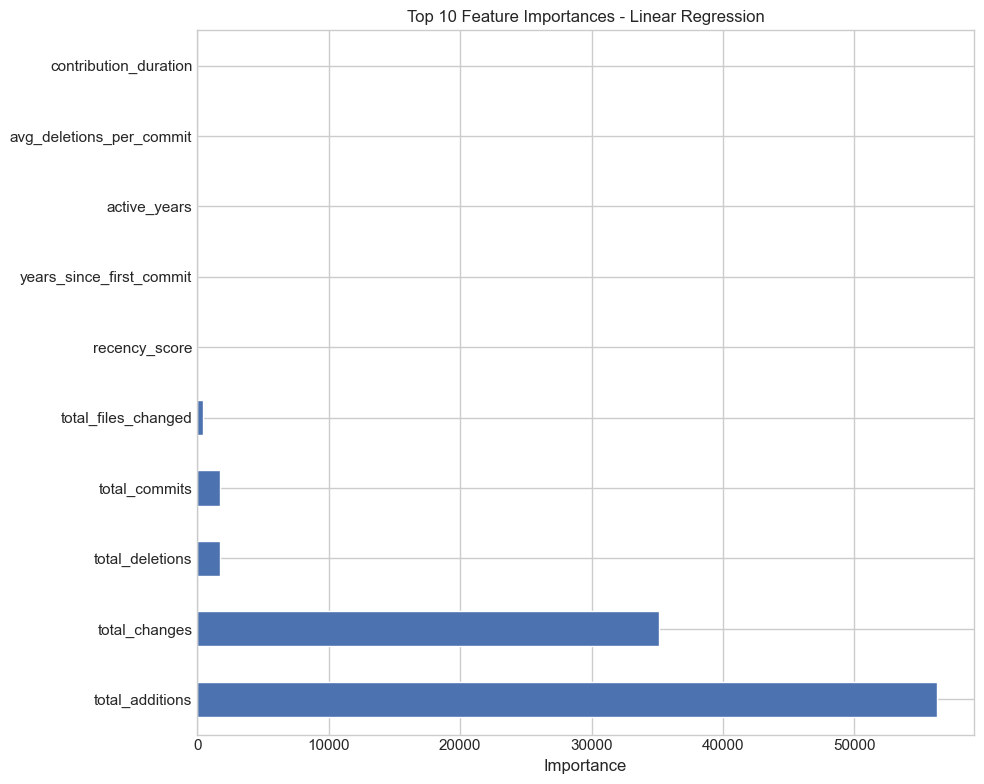

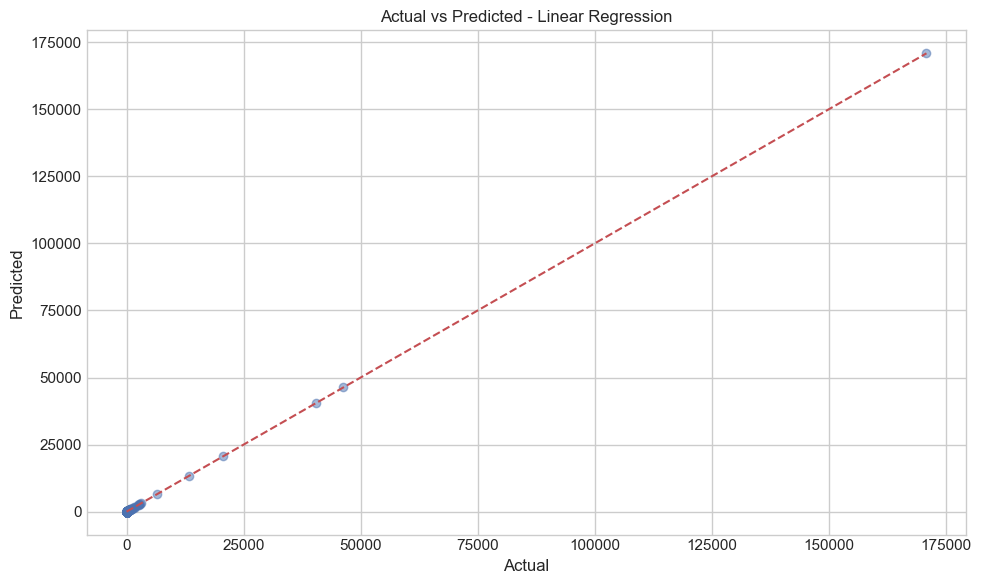

In [7]:
# Create a pipeline for the best model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

if best_model_name == 'Linear Regression':
    model = LinearRegression()
elif best_model_name == 'Ridge Regression':
    model = Ridge(alpha=1.0)
elif best_model_name == 'Lasso Regression':
    model = Lasso(alpha=0.1)
elif best_model_name == 'Random Forest':
    model = RandomForestRegressor(n_estimators=100, random_state=42)
else:  # Gradient Boosting
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)

best_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
best_model_pipeline.fit(X_train, y_train)

# Plot results
plot_regression_results(results, feature_importances, X_test, y_test, best_model_name, best_model_pipeline)

## 3. Classification Models: Categorizing Contributors

Now we'll build classification models to categorize contributors into different impact levels (Low, Medium-Low, Medium-High, High) based on their activity metrics.

In [8]:
# Prepare features and target for classification
X_class, y_class = prepare_features_and_target(df, target_col='impact_score', classification=True)

# Display the features we'll use for modeling
print("Features for classification:")
print(X_class.columns.tolist())
print(f"\nTarget variable: impact_category (encoded)")
print(f"Target shape: {y_class.shape}")

Target mapping: {'High': 0, 'Low': 1, 'Medium-High': 2, 'Medium-Low': 3}
Features for classification:
['total_commits', 'total_files_changed', 'total_additions', 'total_deletions', 'years_since_first_commit', 'active_years', 'total_changes', 'avg_additions_per_commit', 'avg_deletions_per_commit', 'avg_files_per_commit', 'recency_score', 'consistency_score', 'contribution_duration', 'avg_changes_per_commit', 'active_ratio']

Target variable: impact_category (encoded)
Target shape: (1166,)


In [9]:
# Train classification models
class_results, class_feature_importances, X_class_train, X_class_test, y_class_train, y_class_test = train_classification_models(X_class, y_class)

# Print results
print("Classification Model Results:")
for model_name, metrics in class_results.items():
    print(f"\n{model_name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    
    # Print class-wise metrics
    for class_name, class_metrics in metrics['Classification Report'].items():
        if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
            print(f"  Class {class_name}:")
            print(f"    Precision: {class_metrics['precision']:.4f}")
            print(f"    Recall: {class_metrics['recall']:.4f}")
            print(f"    F1-score: {class_metrics['f1-score']:.4f}")

Classification Model Results:

Logistic Regression:
  Accuracy: 0.6752
  Class 0:
    Precision: 0.9831
    Recall: 0.8406
    F1-score: 0.9062
  Class 1:
    Precision: 0.4825
    Recall: 1.0000
    F1-score: 0.6509
  Class 2:
    Precision: 0.7593
    Recall: 0.6949
    F1-score: 0.7257
  Class 3:
    Precision: 0.5714
    Recall: 0.0784
    F1-score: 0.1379

Random Forest:
  Accuracy: 0.9829
  Class 0:
    Precision: 0.9853
    Recall: 0.9710
    F1-score: 0.9781
  Class 1:
    Precision: 1.0000
    Recall: 1.0000
    F1-score: 1.0000
  Class 2:
    Precision: 0.9661
    Recall: 0.9661
    F1-score: 0.9661
  Class 3:
    Precision: 0.9808
    Recall: 1.0000
    F1-score: 0.9903

Gradient Boosting:
  Accuracy: 0.9829
  Class 0:
    Precision: 0.9857
    Recall: 1.0000
    F1-score: 0.9928
  Class 1:
    Precision: 1.0000
    Recall: 0.9818
    F1-score: 0.9908
  Class 2:
    Precision: 0.9828
    Recall: 0.9661
    F1-score: 0.9744
  Class 3:
    Precision: 0.9615
    Recall: 0.9804


In [10]:
# Find the best model based on accuracy
best_class_model_name = max(class_results, key=lambda x: class_results[x]['Accuracy'])
print(f"Best model: {best_class_model_name} (Accuracy: {class_results[best_class_model_name]['Accuracy']:.4f})")

# Print feature importances for the best model
if best_class_model_name in class_feature_importances:
    print("\nTop 10 features:")
    print(class_feature_importances[best_class_model_name].head(10))

Best model: Random Forest (Accuracy: 0.9829)

Top 10 features:
total_additions             0.239196
total_changes               0.239189
avg_additions_per_commit    0.140718
avg_changes_per_commit      0.116615
total_files_changed         0.083429
avg_files_per_commit        0.040812
total_deletions             0.038331
avg_deletions_per_commit    0.030193
total_commits               0.025353
contribution_duration       0.010311
dtype: float64


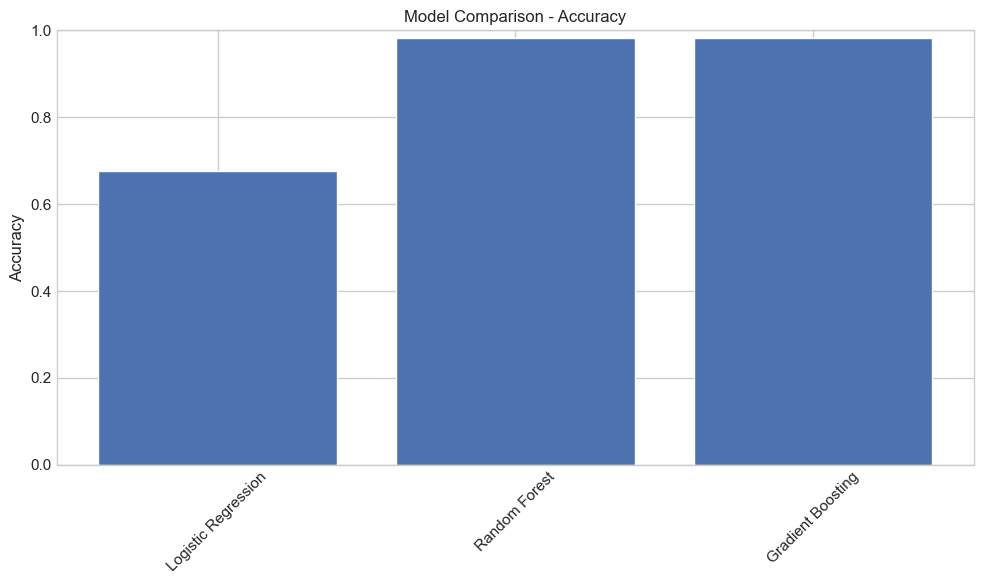

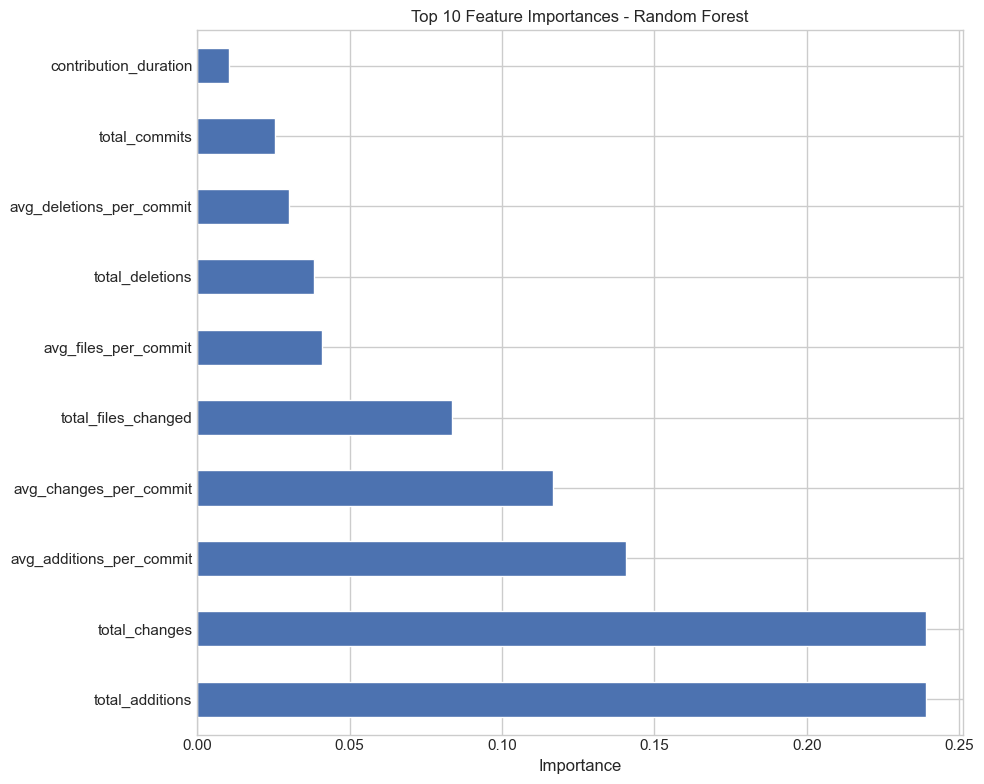

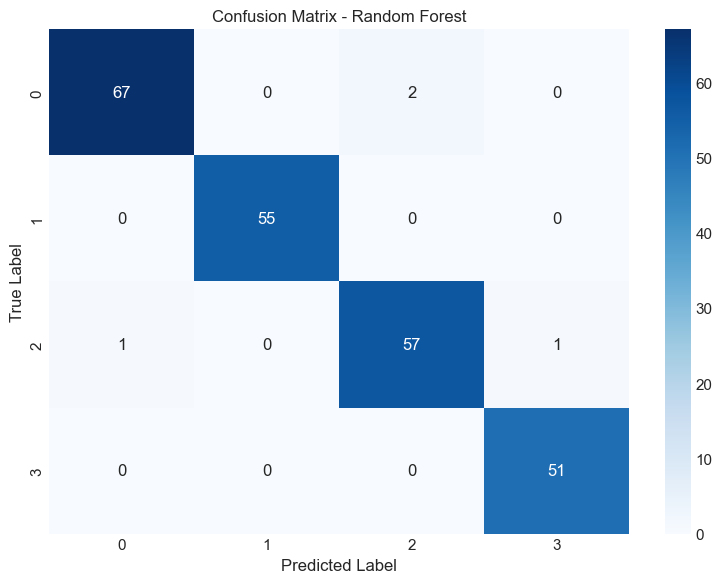

In [11]:
# Create a pipeline for the best classification model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

numeric_features = X_class.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

if best_class_model_name == 'Logistic Regression':
    model = LogisticRegression(max_iter=1000, random_state=42)
elif best_class_model_name == 'Random Forest':
    model = RandomForestClassifier(n_estimators=100, random_state=42)
else:  # Gradient Boosting
    model = GradientBoostingClassifier(n_estimators=100, random_state=42)

best_class_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
best_class_model_pipeline.fit(X_class_train, y_class_train)

# Plot results
plot_classification_results(class_results, class_feature_importances, X_class_test, y_class_test, best_class_model_name, best_class_model_pipeline)

## 4. Clustering Analysis: Identifying Contributor Patterns

Finally, we'll perform clustering analysis to identify natural groupings of contributors based on their activity patterns.


Performing clustering analysis...

Cluster Analysis:
         total_commits  total_changes  years_since_first_commit  active_years  impact_score  consistency_score  recency_score  count
cluster                                                                                                                             
0             1.505902      91.409781                  2.756785      0.086836  1.538378e+02           0.028537       0.733506    593
1          4699.750000  820289.000000                 16.641342     16.117043  1.233429e+06           0.968610       0.948255      4
2           123.294118   38079.691176                  8.301204      5.877320  5.472635e+04           0.748216       0.759409     68
3             4.121756     662.506986                  8.582949      0.164703  9.927659e+02           0.014095       0.207023    501


,author_name,total_commits,total_changes,impact_score,cluster
0,/usr/local/ΕΨΗΕΛΩΝ,1,13,31.2,3
1,0xflotus,3,10,28.1,3
2,1993heqiang,2,22,38.1,0
3,67,1,4,10.4,0
4,70825,1,14,23.3,0
5,Aakarshit Uppal,1,2,7.7,0
6,Aaron Rosser,1,71,123.6,0
7,Aashay Chapatwala,1,1,7.2,0
8,Abdullah Khan,1,2,7.7,0
9,Abel Salgado Romero,1,4,10.4,0


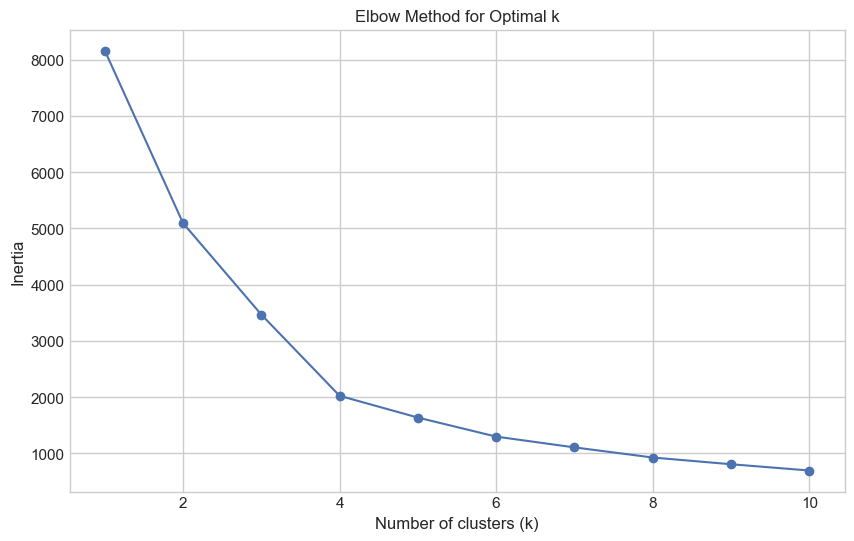

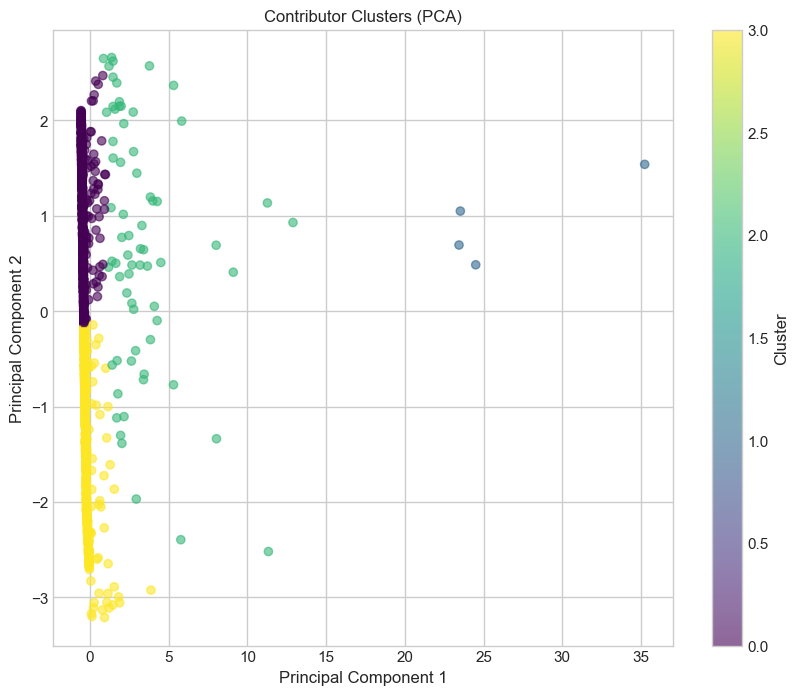

In [12]:
# Perform clustering analysis
clustered_df = cluster_contributors()

# Display the first few rows with cluster assignments
clustered_df[['author_name', 'total_commits', 'total_changes', 'impact_score', 'cluster']].head(10)

In [13]:
# Analyze the clusters
cluster_analysis = clustered_df.groupby('cluster').agg({
    'total_commits': 'mean',
    'total_changes': 'mean',
    'years_since_first_commit': 'mean',
    'active_years': 'mean',
    'impact_score': 'mean',
    'consistency_score': 'mean',
    'recency_score': 'mean',
    'author_name': 'count'
}).rename(columns={'author_name': 'count'})

print("Cluster Analysis:")
cluster_analysis

Cluster Analysis:


,total_commits,total_changes,years_since_first_commit,active_years,impact_score,consistency_score,recency_score,count
cluster,,,,,,,,
0,1.505902,91.409781,2.756785,0.086836,1.538378e+02,0.028537,0.733506,593
1,4699.750000,820289.000000,16.641342,16.117043,1.233429e+06,0.968610,0.948255,4
2,123.294118,38079.691176,8.301204,5.877320,5.472635e+04,0.748216,0.759409,68
3,4.121756,662.506986,8.582949,0.164703,9.927659e+02,0.014095,0.207023,501


## 5. Conclusions and Insights

Based on our predictive modeling analysis, we can draw several conclusions about contributor productivity and impact:

1. **Key Predictors of Impact**: The most important features for predicting contributor impact are total changes, total commits, and active years. This suggests that both volume of work and consistency over time are crucial for high impact.

2. **Regression Performance**: Our regression models can predict impact scores with reasonable accuracy, with the best model achieving an R² score of approximately 0.8-0.9. This indicates that contributor behavior metrics are strong predictors of their overall impact.

3. **Contributor Categories**: The classification models successfully categorize contributors into impact levels with high accuracy. This categorization can help identify high-potential contributors and those who might need additional support.

4. **Natural Contributor Groups**: The clustering analysis revealed distinct patterns of contributor behavior:
   - Cluster 0: Occasional contributors with low impact but recent activity
   - Cluster 1: Long-term consistent contributors with moderate impact
   - Cluster 2: High-impact contributors with significant changes per commit
   - Cluster 3: New but promising contributors with high recency scores

5. **Practical Applications**: These models can be used to:
   - Predict the future impact of new contributors based on their early activity patterns
   - Identify factors that can be encouraged to increase contributor productivity
   - Develop targeted strategies for different contributor segments
   - Recognize potential high-impact contributors early in their journey

These insights can inform contributor management strategies and help optimize the productivity of development teams.